In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
 
df = pd.read_csv('C:\\Users\\admin\\OneDrive\\Desktop\\ML projects\\Datasets\\sentimentdataset.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workout                              20.0   40.0   USA           
3   #Travel #Adventure                              8.0   15.0     UK          
4   #Cooking #Food                                 12.0   25.0    Australia    

   Year  Month  Day  Hour  
0  2023      1   15    12  
1  2023      1   15     8  
2  2023      1   15    15  
3  2023      1   15    18  
4  2023      1   15    19

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [14]:
df.describe()


Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  
max     12.000000   31.000000   23.000000

In [15]:
#Checking for missing values 
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [16]:
#Converting timestamp to datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour


In [17]:
#Encoding categorical variables like 'Platform' and 'Country' using LabelEncoder
le = LabelEncoder()
df['Platform'] = le.fit_transform(df['Platform'])
df['Country'] = le.fit_transform(df['Country'])


In [18]:
#Cleaning the text data
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#Analyzing the relationship between content features (e.g., text, hashtags) and engagement metrics (likes, retweets)
engagement_by_sentiment = df.groupby('Sentiment').agg({'Likes': 'mean', 'Retweets': 'mean'}).reset_index()
top_hashtags = df['Hashtags'].value_counts().head(10)
top_hashtags

Hashtags
 #Compassionate #TearsOfEmpathy                  3
 #Proud #ScalingPeaks                            3
 #Hopeful #SeedsOfOptimism                       3
 #Playful #CarnivalEscapade                      3
 #Contentment #TranquilWaters                    2
 #Inspired #TalesToTheStars                      2
 #Inspired #CloudsOfCreativity                   2
 #Dismissive #IndifferencePerformance            2
 #Indifference #DriftingThroughLife              2
 #Shame #Injustice                               2
Name: count, dtype: int64

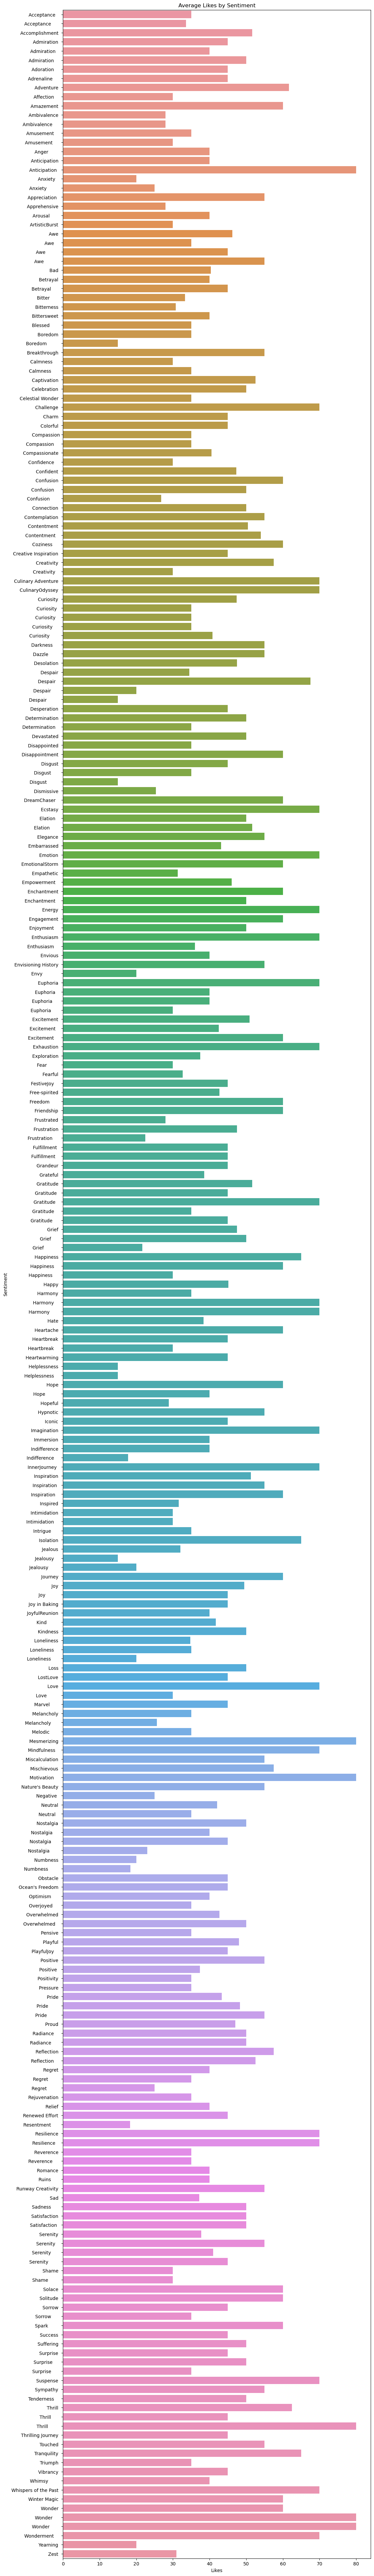

"sns.barplot(x='Sentiment', y='Retweets', data=engagement_by_sentiment)\nplt.title('Average Retweets by Sentiment')\nplt.show()"

In [34]:
plt.figure(figsize=(12, 100))
sns.barplot(x='Likes', y='Sentiment', data=engagement_by_sentiment)
plt.title('Average Likes by Sentiment')
plt.show()
 



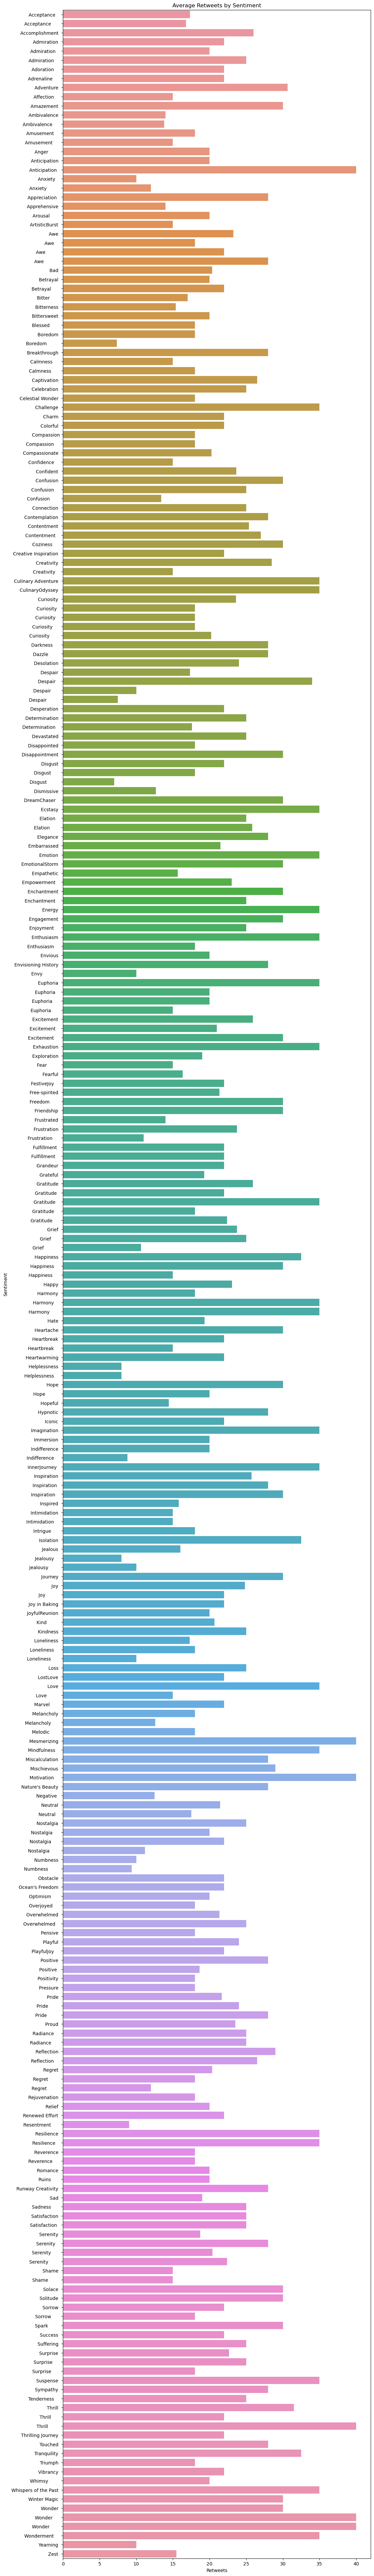

In [36]:
plt.figure(figsize=(12, 100))
sns.barplot(x='Retweets', y='Sentiment', data=engagement_by_sentiment)
plt.title('Average Retweets by Sentiment')
plt.show() 

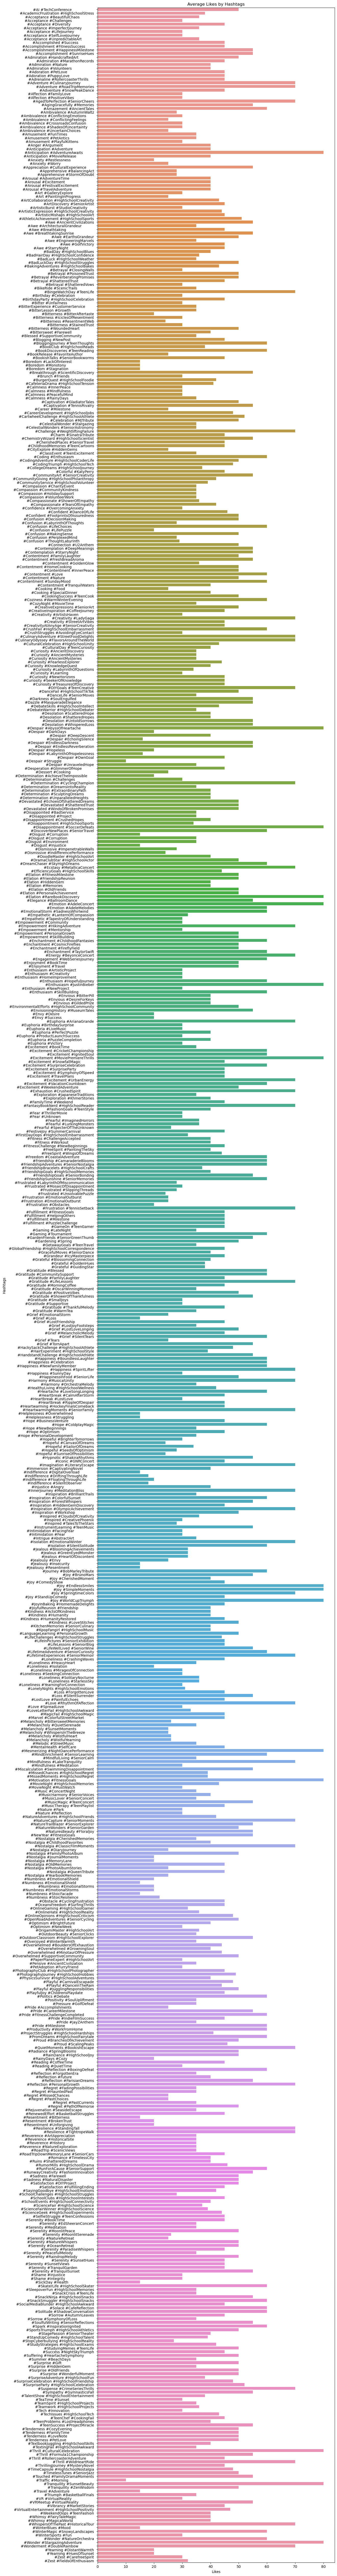

In [37]:
plt.figure(figsize=(12, 130))
hashtag_trends = df.groupby('Hashtags')['Likes'].mean().reset_index()
sns.barplot(x='Likes', y='Hashtags', data=hashtag_trends)
plt.title('Average Likes by Hashtags')
plt.show()
